# Лабораторная работа 5. Свёрточные сети

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.utils as vutils
import torchvision
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
manualSeed = 42
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)

Random Seed:  42


Загрузим датасет [`FashionMNIST`](https://docs.pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html) и визуализируем примеры изображений из него.

In [3]:
batch_size = 64
transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])
train_set = torchvision.datasets.FashionMNIST(root='FashionMNIST', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=2)
val_set = torchvision.datasets.FashionMNIST(root='FashionMNIST', train=False, download=True, transform=transform)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=batch_size, shuffle=False, num_workers=2)

100%|██████████| 26.4M/26.4M [00:10<00:00, 2.48MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 267kB/s]
100%|██████████| 4.42M/4.42M [00:02<00:00, 1.56MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 15.8MB/s]


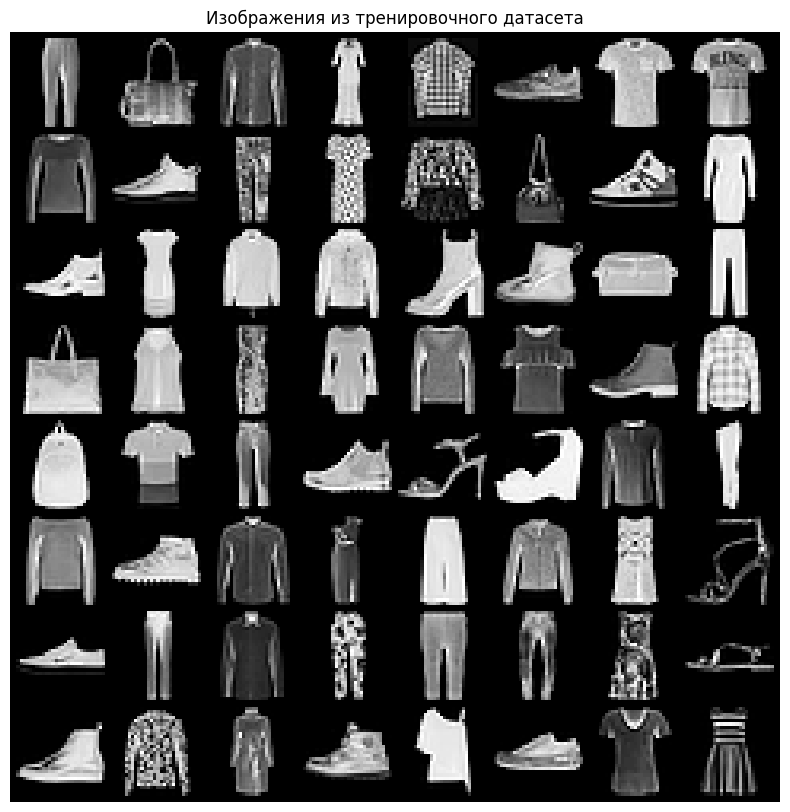

In [5]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

real_batch = next(iter(train_loader))

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

plt.figure(figsize=(10,10))
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device), normalize=True).cpu(),(1,2,0)))
plt.axis("off")
plt.title("Изображения из тренировочного датасета")
plt.show()

#### Задание 1.
Постройте свёрточную сеть `LeNet-5`. Используя созданные `train_loader` и `val_loader`, обучите модель распознавать одежду из датасета `FashionMNIST`.

Поэкспериментируйте с гиперпараметрами и постарайтесь достичь точности (`accuracy`) распознавания не менее `0.8` на валидационной подвыборке.

In [ ]:
# Ваш код

#### Задание 2.
Поэкспериментировуйте с параметрами `LeNet-5` и найдите оптимальную архитектуру для `FashionMNIST`.  

Параметры для подбора:
- количество свёрточных слоев
- функция активации (Tanh, ReLU)
- способ субдискретизации (Average, Max)
- размер фильтров
- количество фильтров

Какую наилучшую точность получилось достичь на валидационной подвыборке?

In [ ]:
# Ваш код

#### Задание 3 (факультативное).
Построить свёрточную сеть по одной из рассмотренных архитектур (AlexNet, VGG, Inception, ResNet) и обучить её распознаванию MNIST (FashionMNIST, CIFAR10).

#### Задание 4 (факультативное).
Прочитать параграф 5.3 в учебнике С. Николенко и др. (стр. 199–206) и воспроизвести рассмотренные там нейронные сети на TensorFlow и Keras.